### __*Import Statements*__

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from IPython.display import display

### __*Reading CSV Files*__

In [92]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
submit = pd.read_csv('sample_submission.csv')

### __*Checking DataFrames*__

#### _Shapes of the Dataframes_

In [93]:
train.shape

(8693, 14)

In [94]:
test.shape

(4277, 13)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


_**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data._<br>
_**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always._<br>
_**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence._<br>
_**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins._<br>
_**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard._<br>
_**Destination** - The planet the passenger will be debarking to._<br>
_**Age** - The age of the passenger._<br>
_**VIP** - Whether the passenger has paid for special VIP service during the voyage._<br>
_**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities._<br>
_**Name** - The first and last names of the passenger._<br>
_**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict._<br><br>
_**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set._<br><br>
_s**ample_submission.cs**v - A submission file in the correct format._<br>
_**PassengerId** - Id for each passenger in the test set._<br>
_**Transported** - The target. For each passenger, predict either True or False._<br>

#### _Data types of the columns in the Dataframes_

In [96]:
train.dtypes.to_frame('Data Type')

,Data Type
PassengerId,object
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


In [97]:
test.dtypes.to_frame('Data Type')

,Data Type
PassengerId,object
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


#### _First 5 rows of the Dataframes_

In [98]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


_We see that test dataframe does not have 'Transported' column._ 

In [99]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


#### _Unique Value Counts in the Dataframes_

In [100]:
train.nunique().to_frame('Unique Value Counts')

,Unique Value Counts
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115


In [101]:
test.nunique().to_frame('Unique Value Counts')

,Unique Value Counts
PassengerId,4277
HomePlanet,3
CryoSleep,2
Cabin,3265
Destination,3
Age,79
VIP,2
RoomService,842
FoodCourt,902
ShoppingMall,715


#### _Checking Duplicacy_

In [102]:
train.duplicated().any()

False

In [103]:
test.duplicated().any()

False

#### _Missing Value Counts_

In [104]:
train_na = train.isna().sum().to_frame('Missing Value Counts')
train_na['Percentage'] = round((train.isna().sum() / len(train) * 100), 2)
train_na

,Missing Value Counts,Percentage
PassengerId,0,0.00
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39


In [105]:
test_na = test.isna().sum().to_frame('Missing Value Counts')
test_na['Percentage'] = round((test.isna().sum() / len(test) * 100), 2)
test_na

,Missing Value Counts,Percentage
PassengerId,0,0.00
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29


### __*Feature Engineering and Visualization*__

#### _Membership Features_

_Filling existing empty Membership values_

In [106]:
train['CryoSleep'] = train['CryoSleep'].fillna(train['CryoSleep'].mode().iloc[0])
test['CryoSleep'] = test['CryoSleep'].fillna(test['CryoSleep'].mode().iloc[0])

train['VIP'] = train['VIP'].fillna(train['VIP'].mode().iloc[0])
test['VIP'] = test['VIP'].fillna(test['VIP'].mode().iloc[0])

/tmp/ipykernel_25032/1944400537.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['CryoSleep'] = train['CryoSleep'].fillna(train['CryoSleep'].mode().iloc[0])
/tmp/ipykernel_25032/1944400537.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['CryoSleep'] = test['CryoSleep'].fillna(test['CryoSleep'].mode().iloc[0])
/tmp/ipykernel_25032/1944400537.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the futu

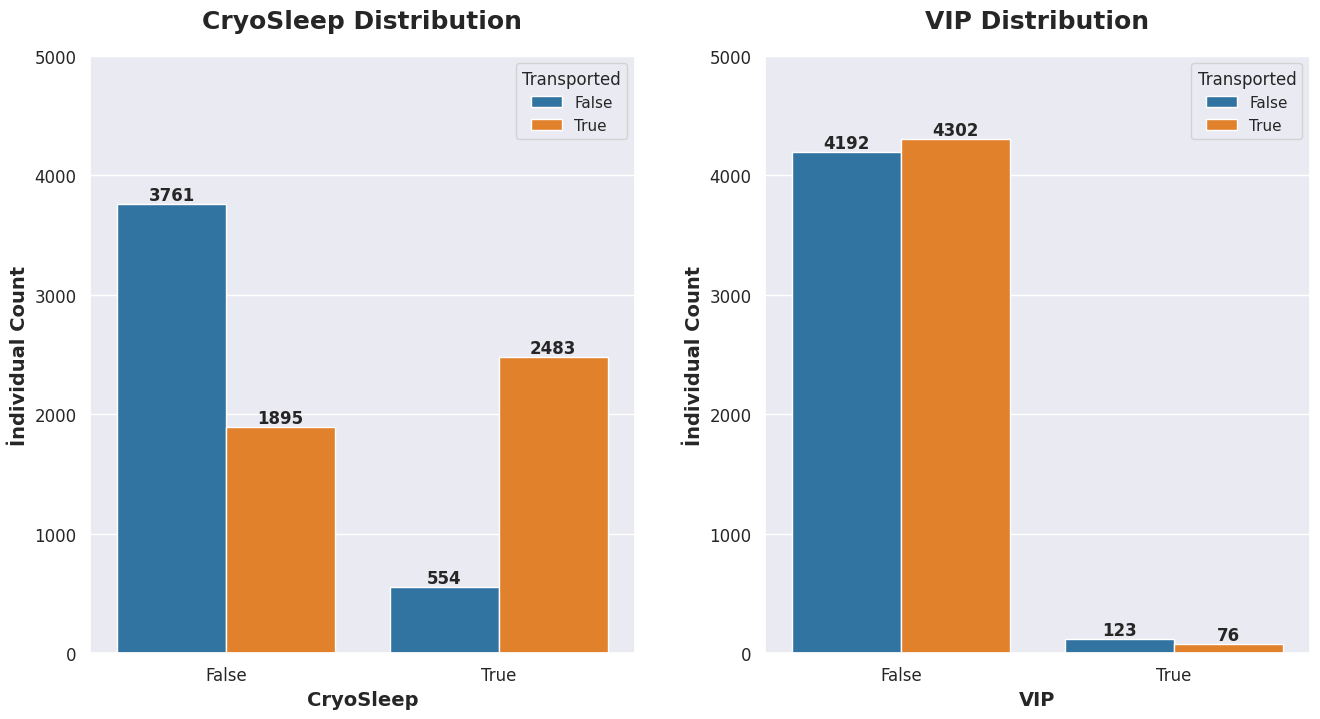

In [107]:
sns.set_theme(style='darkgrid', palette='tab10')
fig, axs = plt.subplots(1, 2, figsize=(14, 8), facecolor='white')

loc_features = ['CryoSleep', 'VIP']

for i, column in enumerate(loc_features):
    bar = sns.countplot(data=train, x=column, ax=axs[i], hue='Transported')
    axs[i].set_ylabel('İndividual Count', fontsize=14, fontweight='bold')
    axs[i].set_xlabel(column, fontsize=14, fontweight='bold')
    axs[i].tick_params(axis='both', labelsize=12)
    axs[i].set_title(label=f'{column} Distribution', fontsize=18, fontweight='bold', pad=20)
    axs[i].set_ylim([0, 5000])

    for j in bar.containers:
        bar.bar_label(j, padding=0, fontsize=12, fontweight='bold')

plt.tight_layout(pad=3)
plt.show()

#### _Locational Features_

_Filling existing empty Locational values_

In [108]:
train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode().iloc[0])
test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode().iloc[0])

train['Destination'] = train['Destination'].fillna(train['Destination'].mode().iloc[0])
test['Destination'] = test['Destination'].fillna(test['Destination'].mode().iloc[0])

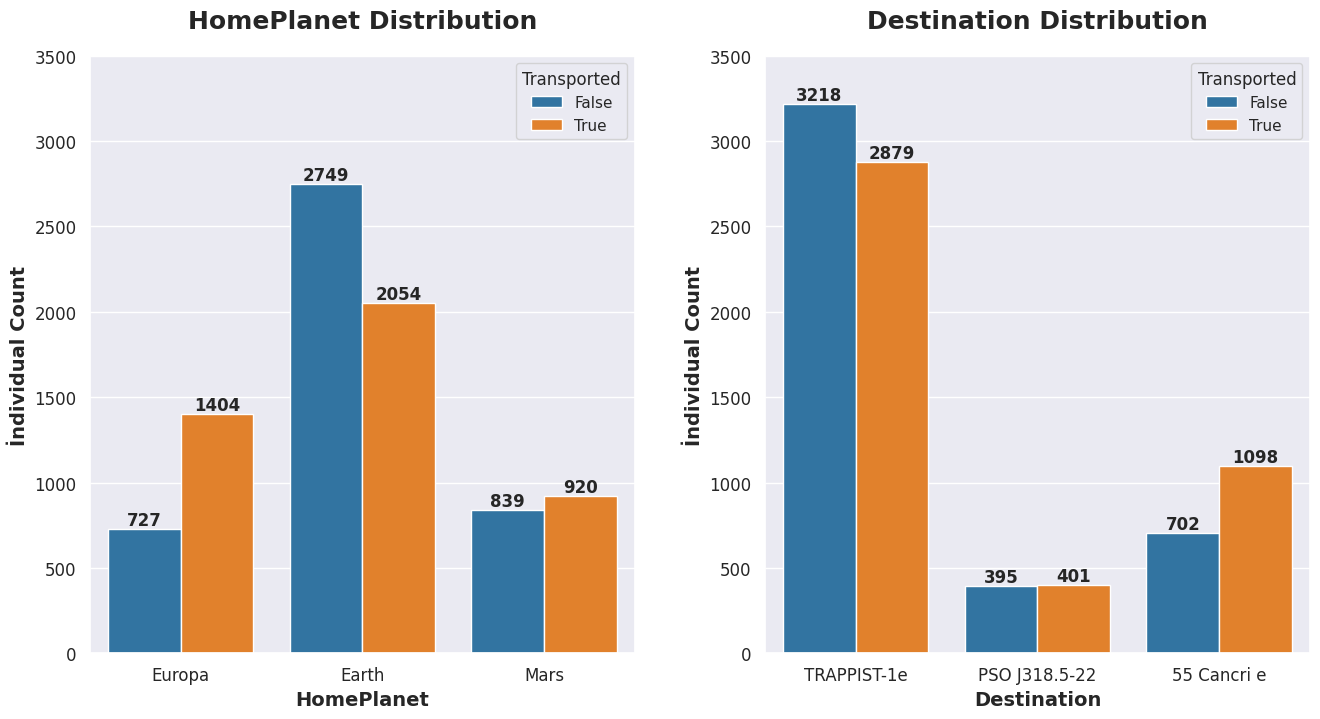

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8), facecolor='white')

loc_features = ['HomePlanet', 'Destination']

for i, column in enumerate(loc_features):
    bar = sns.countplot(data=train, x=column, ax=axs[i], hue='Transported')
    axs[i].set_ylabel('İndividual Count', fontsize=14, fontweight='bold')
    axs[i].set_xlabel(column, fontsize=14, fontweight='bold')
    axs[i].tick_params(axis='both', labelsize=12)
    axs[i].set_title(label=f'{column} Distribution', fontsize=18, fontweight='bold', pad=20)
    axs[i].set_ylim([0, 3500])

    for j in bar.containers:
        bar.bar_label(j, padding=0, fontsize=12, fontweight='bold')

plt.tight_layout(pad=3)
plt.show()

#### _Expenditure Features_

_Filling existing empty Expenditure values_

In [110]:
train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [111]:
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].mean())
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].mean())

train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].mean())
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].mean())

train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].mean())

train['Spa'] = train['Spa'].fillna(train['Spa'].mean())
test['Spa'] = test['Spa'].fillna(test['Spa'].mean())

train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].mean())
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].mean())

_Expenditure for each category_

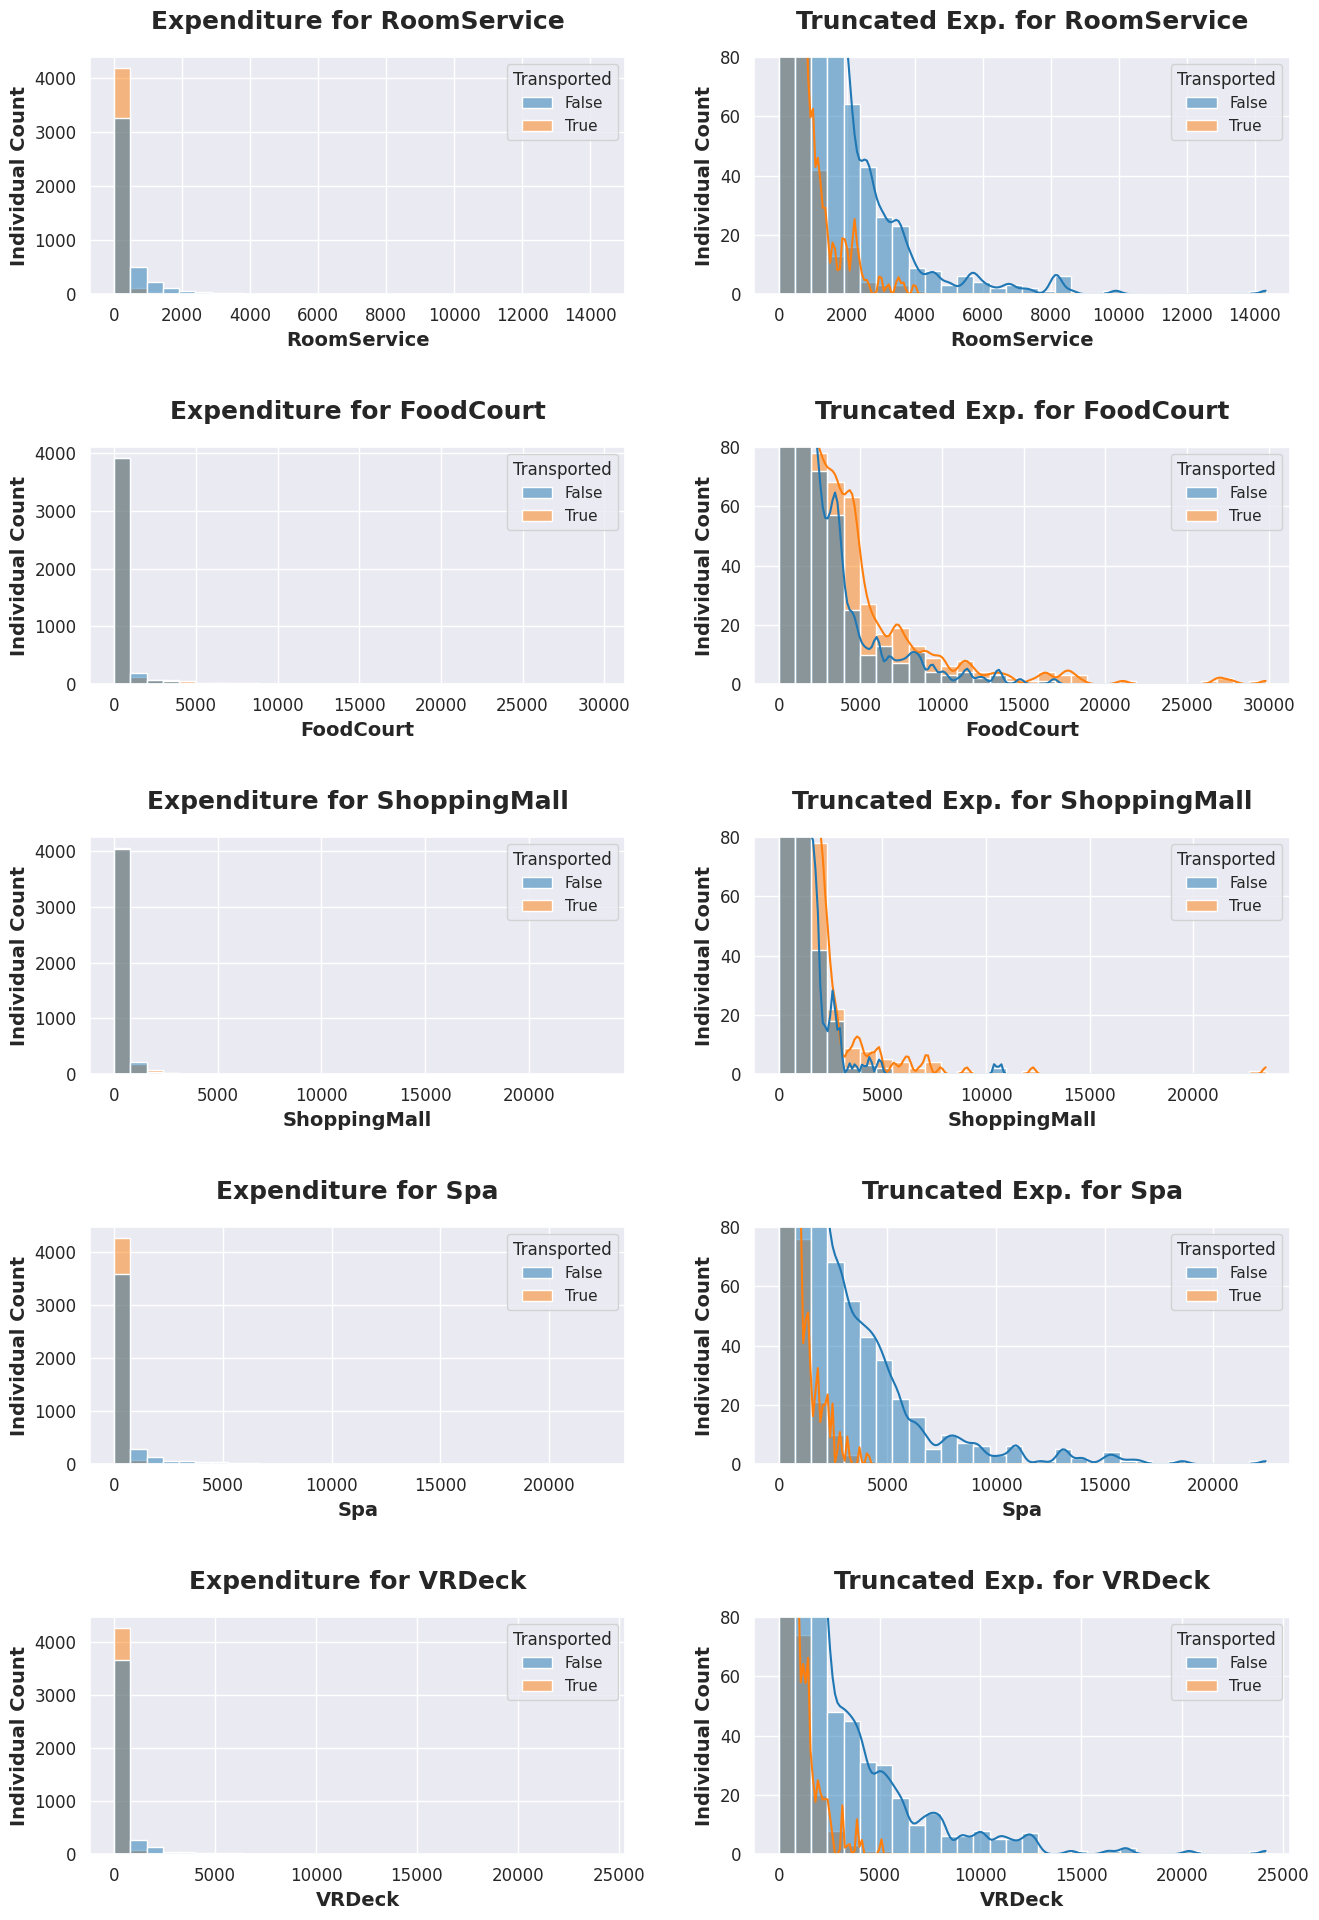

In [112]:
fig, axs = plt.subplots(5, 2, figsize=(14, 20), facecolor='white')
bar_width = 0.35

exp_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for i, name in enumerate(exp_features):
    # Left plot
    ax_left = axs[i, 0]
    sns.histplot(data=train, x=name, ax=ax_left, bins=30, kde=False, hue='Transported')
    ax_left.set_ylabel('Individual Count', fontsize=14, fontweight='bold')
    ax_left.set_xlabel(name, fontsize=14, fontweight='bold')
    ax_left.tick_params(axis='both', labelsize=12)
    ax_left.set_title(f'Expenditure for {name}',  fontsize=18, fontweight='bold', pad=20)
    
    # Right plot (truncated)
    ax_right= axs[i, 1]
    sns.histplot(data=train, x=name, ax=ax_right, bins=30, kde=True, hue='Transported')
    ax_right.set_ylabel('Individual Count', fontsize=14, fontweight='bold')
    ax_right.set_xlabel(name, fontsize=14, fontweight='bold')
    ax_right.tick_params(axis='both', labelsize=12)
    ax_right.set_title(f'Truncated Exp. for {name}', fontsize=18, fontweight='bold', pad=20)
    ax_right.set_ylim([0, 80])

plt.tight_layout(pad=3)
plt.show()

_Adding two new columns_<br><br>
**Expenditure**: _Total expenditures of all categories_<br>
**HasExpenditure**: _Bool value of having any expenditures or not_

In [113]:
train['Expenditure']=train[exp_features].sum(axis=1)
train['HasExpenditure']=(train['Expenditure']!=0)

test['Expenditure']=test[exp_features].sum(axis=1)
test['HasExpenditure']=(test['Expenditure']!=0)

In [114]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Expenditure,HasExpenditure
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,True


In [115]:
train['Expenditure'].describe().to_frame()

,Expenditure
count,8693.000000
mean,1472.487559
std,2799.915709
min,0.000000
25%,0.000000
50%,727.000000
75%,1461.000000
max,35987.000000


_Histogram of the Total Expenditures_

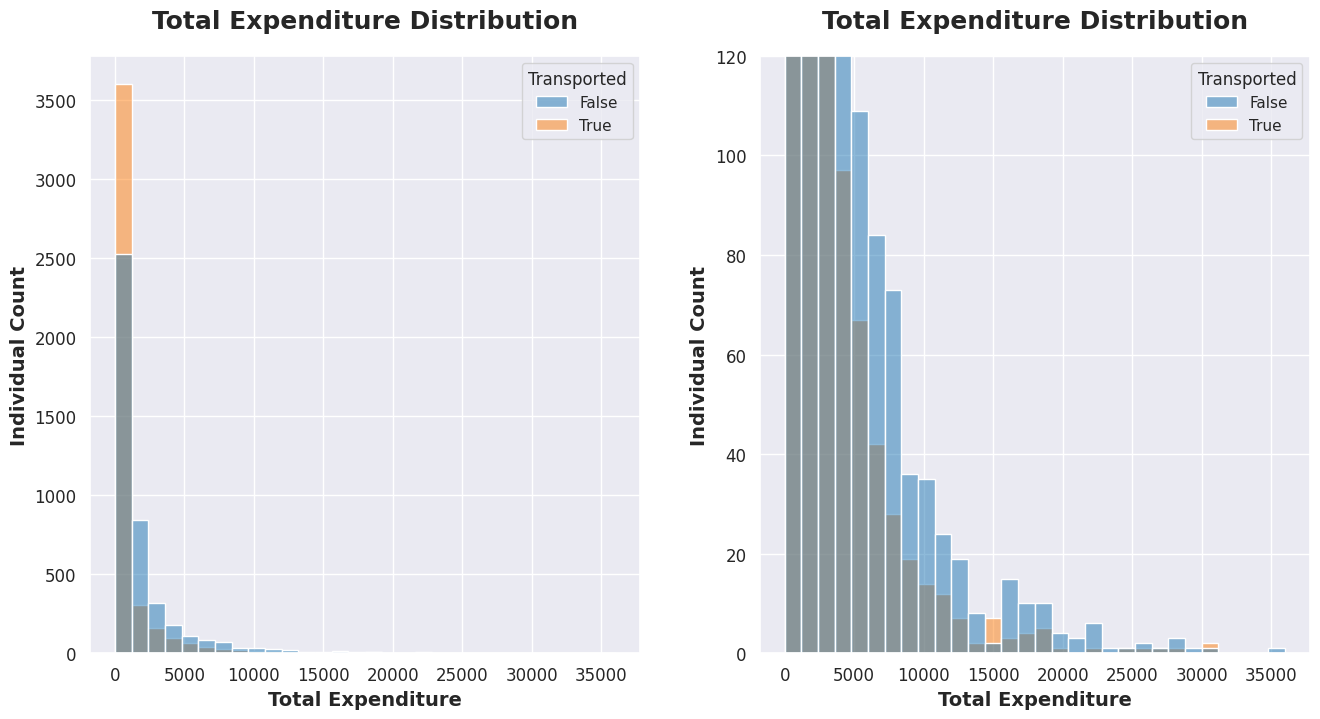

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8), facecolor='white')

for i in range(2):
    sns.histplot(data=train, x='Expenditure', ax=axs[i], bins=30, kde=False, hue='Transported')
    axs[i].set_ylabel('Individual Count', fontsize=14, fontweight='bold')
    axs[i].set_xlabel('Total Expenditure', fontsize=14, fontweight='bold')
    axs[i].tick_params(axis='both', labelsize=12)
    axs[i].set_title(f'Total Expenditure Distribution',  fontsize=18, fontweight='bold', pad=20)

axs[1].set_ylim([0, 120])
plt.tight_layout(pad=3)
plt.show()

_Creating new features based on Expenditure_

In [117]:
train['ExpenditureCategory'] = np.nan
train.loc[train['Expenditure'] == 0, 'ExpenditureCategory']= 'No Expenses'
train.loc[(train['Expenditure'] > 0) & (train['Expenditure'] <= 727), 'ExpenditureCategory']= 'Low Expenses'
train.loc[(train['Expenditure'] > 727) & (train['Expenditure'] <= 1472), 'ExpenditureCategory']= 'Medium Expenses'
train.loc[train['Expenditure'] > 1472, 'ExpenditureCategory'] = 'High Expenses'

test['ExpenditureCategory'] = np.nan
test.loc[test['Expenditure'] == 0, 'ExpenditureCategory']= 'No Expenses'
test.loc[(test['Expenditure'] > 0) & (test['Expenditure'] <= 727), 'ExpenditureCategory']= 'Low Expenses'
test.loc[(test['Expenditure'] > 727) & (test['Expenditure'] <= 1472), 'ExpenditureCategory']= 'Medium Expenses'
test.loc[test['Expenditure'] > 1472, 'ExpenditureCategory'] = 'High Expenses'

/tmp/ipykernel_25032/493388416.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Expenses' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[train['Expenditure'] == 0, 'ExpenditureCategory']= 'No Expenses'
/tmp/ipykernel_25032/493388416.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Expenses' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.loc[test['Expenditure'] == 0, 'ExpenditureCategory']= 'No Expenses'


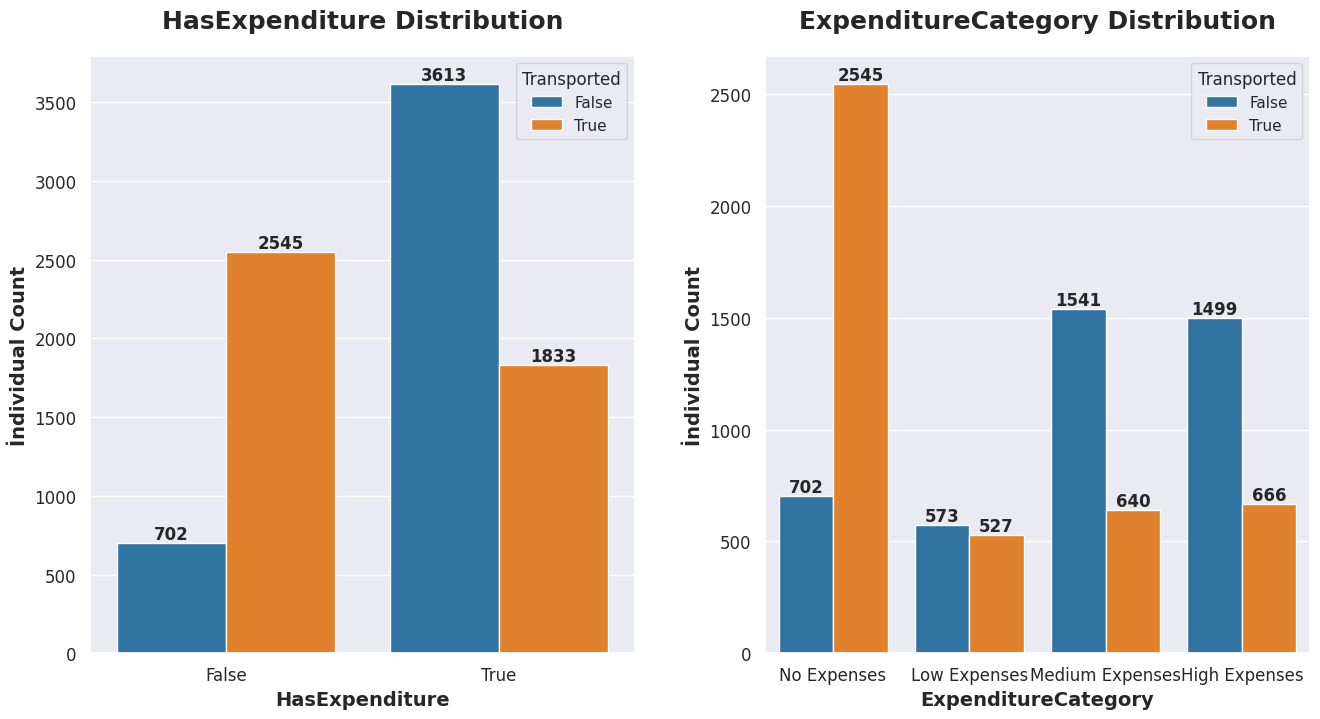

In [118]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8), facecolor='white')

exp_columns = ['HasExpenditure', 'ExpenditureCategory']

for i, column in enumerate(exp_columns):
    if i == 0:
        bar = sns.countplot(data=train, x=column, ax=axs[i], hue='Transported')
    else:
        bar = sns.countplot(data=train, x=column, ax=axs[i], hue='Transported', order=['No Expenses', 'Low Expenses', 'Medium Expenses', 'High Expenses'])
    axs[i].set_ylabel('İndividual Count', fontsize=14, fontweight='bold')
    axs[i].set_xlabel(column, fontsize=14, fontweight='bold')
    axs[i].tick_params(axis='both', labelsize=12)
    axs[i].set_title(f'{column} Distribution',  fontsize=18, fontweight='bold', pad=20)

    for j in bar.containers:
        bar.bar_label(j, padding=0, fontsize=12, fontweight='bold')

plt.tight_layout(pad=3)
plt.show()

In [119]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Expenditure,HasExpenditure,ExpenditureCategory
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.000000,Maham Ofracculy,False,0.000000,False,No Expenses
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.000000,Juanna Vines,True,736.000000,True,Medium Expenses
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.000000,Altark Susent,False,10383.000000,True,High Expenses
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.000000,Solam Susent,False,5176.000000,True,High Expenses
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.000000,Willy Santantines,True,1091.000000,True,Medium Expenses
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.000000,Sandie Hinetthews,True,774.000000,True,Medium Expenses
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.000000,Billex Jacostaffey,True,1584.000000,True,High Expenses
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,304.854791,Candra Jacostaffey,True,304.854791,True,Low Expenses
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.000000,Andona Beston,True,1018.000000,True,Medium Expenses
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.000000,Erraiam Flatic,True,0.000000,False,No Expenses


#### _Age Features_

_Filling existing empty Age values_

In [120]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [121]:
train['Age'] = pd.to_numeric(train['Age'], errors='coerce', downcast='integer')
test['Age'] = pd.to_numeric(test['Age'], errors='coerce', downcast='integer')

In [122]:
train['Age'].describe()

count    8693.000000
mean       28.790291
std        14.341404
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

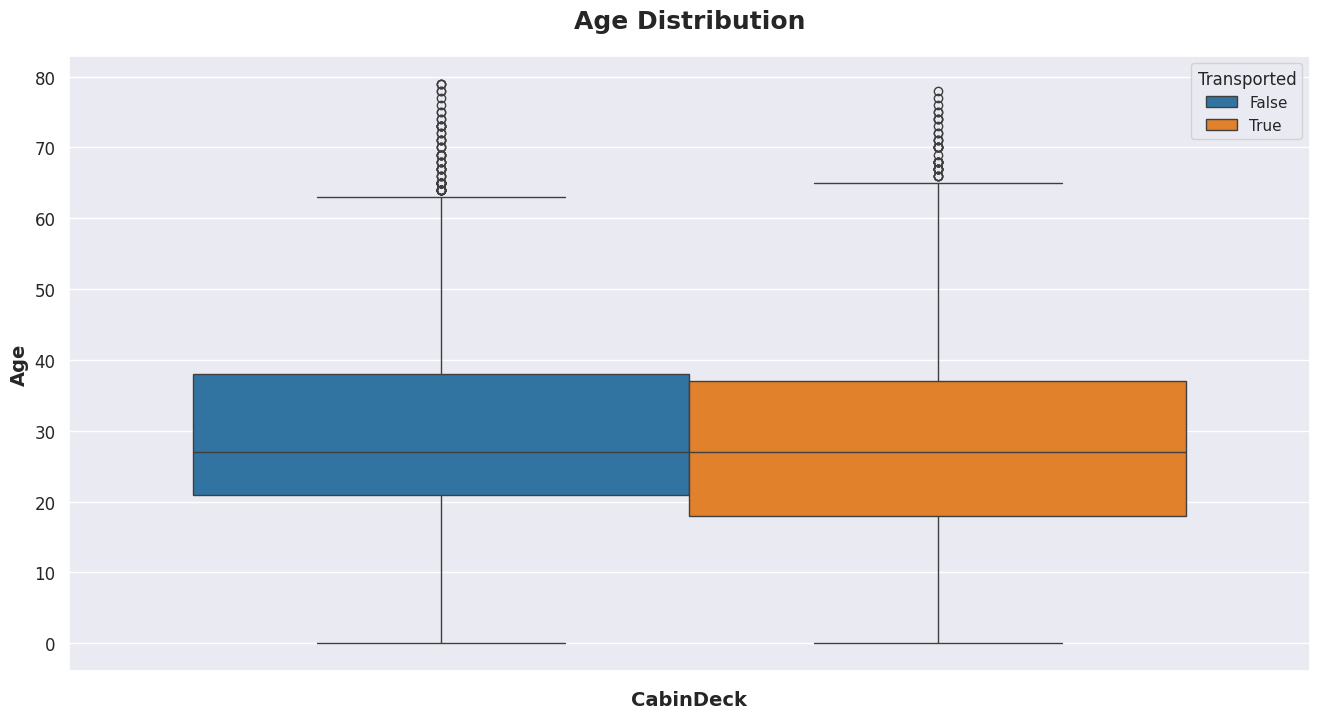

In [123]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8), facecolor='white')

sns.boxplot(y='Age', data=train, hue='Transported', ax=axs)
axs.set_ylabel('Age', fontsize=14, fontweight='bold')
axs.set_xlabel('CabinDeck', fontsize=14, fontweight='bold')
axs.tick_params(axis='both', labelsize=12)
axs.set_title(f'Age Distribution',  fontsize=18, fontweight='bold', pad=20)

plt.tight_layout(pad=3)
plt.show()

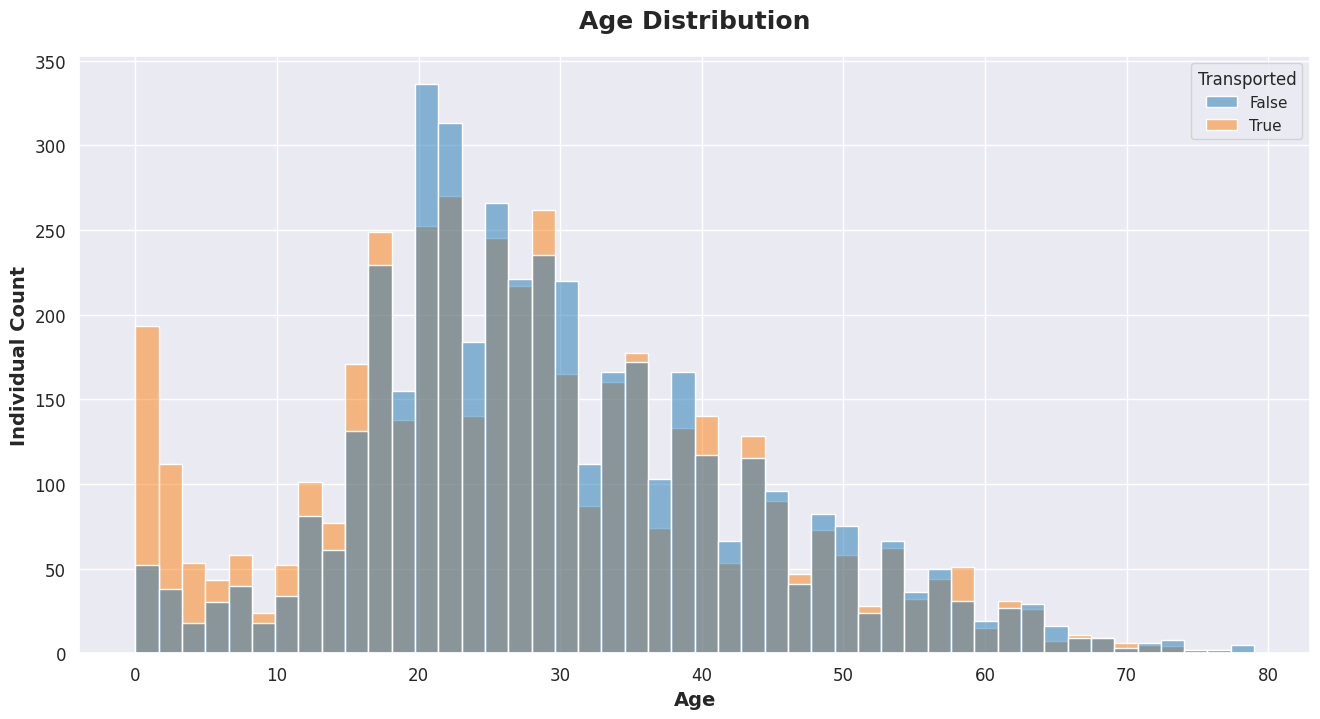

In [124]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8), facecolor='white')

sns.histplot(data=train, x='Age', ax=axs, kde=False, hue='Transported')
axs.set_ylabel('Individual Count', fontsize=14, fontweight='bold')
axs.set_xlabel('Age', fontsize=14, fontweight='bold')
axs.tick_params(axis='both', labelsize=12)
axs.set_title(f'Age Distribution',  fontsize=18, fontweight='bold', pad=20)

plt.tight_layout(pad=3)
plt.show()

In [125]:
train['AgeGroup'] = np.nan
train.loc[train['Age'] <= 12,'AgeGroup'] = 'Age 0-12'
train.loc[(train['Age'] > 12) & (train['Age'] < 18),'AgeGroup'] = 'Age 13-17'
train.loc[(train['Age'] >= 18) & (train['Age'] <= 25),'AgeGroup'] = 'Age 18-25'
train.loc[(train['Age'] > 25) & (train['Age'] <= 30),'AgeGroup'] = 'Age 26-30'
train.loc[(train['Age'] > 30) & (train['Age'] <= 50),'AgeGroup'] = 'Age 31-50'
train.loc[train['Age'] > 50,'AgeGroup'] = 'Age 51+'

test['AgeGroup']= np.nan
test.loc[test['Age'] <= 12,'AgeGroup'] = 'Age 0-12'
test.loc[(test['Age'] > 12) & (test['Age'] < 18),'AgeGroup'] = 'Age 13-17'
test.loc[(test['Age'] >= 18) & (test['Age'] <= 25),'AgeGroup'] = 'Age 18-25'
test.loc[(test['Age'] > 25) & (test['Age'] <= 30),'AgeGroup'] = 'Age 26-30'
test.loc[(test['Age'] > 30) & (test['Age'] <= 50),'AgeGroup'] = 'Age 31-50'
test.loc[test['Age'] > 50,'AgeGroup'] = 'Age 51+'

/tmp/ipykernel_25032/2776171195.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age 0-12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[train['Age'] <= 12,'AgeGroup'] = 'Age 0-12'
/tmp/ipykernel_25032/2776171195.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age 0-12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.loc[test['Age'] <= 12,'AgeGroup'] = 'Age 0-12'


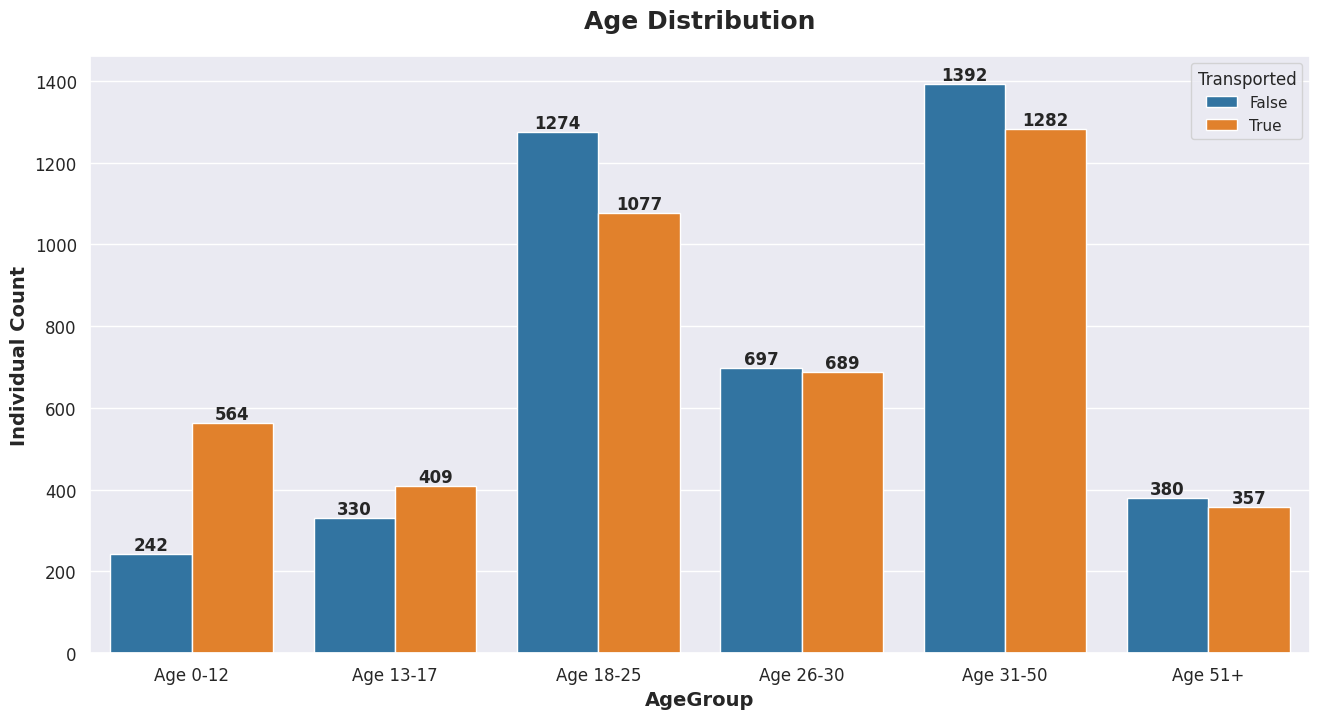

In [126]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8), facecolor='white')

bar = sns.countplot(data=train, x='AgeGroup', hue='Transported', order=['Age 0-12', 'Age 13-17', 'Age 18-25', 'Age 26-30', 'Age 31-50', 'Age 51+'], ax=axs)
axs.set_ylabel('Individual Count', fontsize=14, fontweight='bold')
axs.set_xlabel('AgeGroup', fontsize=14, fontweight='bold')
axs.tick_params(axis='both', labelsize=12)
axs.set_title(f'Age Distribution',  fontsize=18, fontweight='bold', pad=20)

for i in bar.containers:
    bar.bar_label(i, padding=0, fontsize=12, fontweight='bold')

plt.tight_layout(pad=3)
plt.show()

#### _Cabin Features_

_Splitting the Cabin column to get better features_

In [127]:
train[['CabinDeck','CabinNumber','CabinSide']] = train.Cabin.str.split('/',expand=True)
test[['CabinDeck','CabinNumber','CabinSide']] = test.Cabin.str.split('/',expand=True)

train['CabinNumber'] = pd.to_numeric(train['CabinNumber'], errors='coerce')
test['CabinNumber'] = pd.to_numeric(test['CabinNumber'], errors='coerce')

_Filling existing empty Cabin values_

In [128]:
train['CabinDeck'] = train['CabinDeck'].fillna(train['CabinDeck'].mode().iloc[0])
test['CabinDeck'] = test['CabinDeck'].fillna(test['CabinDeck'].mode().iloc[0])
train['CabinNumber'] = train['CabinNumber'].fillna(train['CabinNumber'].median())
test['CabinNumber'] = test['CabinNumber'].fillna(test['CabinNumber'].median())
train['CabinSide'] = train['CabinSide'].fillna(train['CabinSide'].mode().iloc[0])
test['CabinSide'] = test['CabinSide'].fillna(test['CabinSide'].mode().iloc[0])

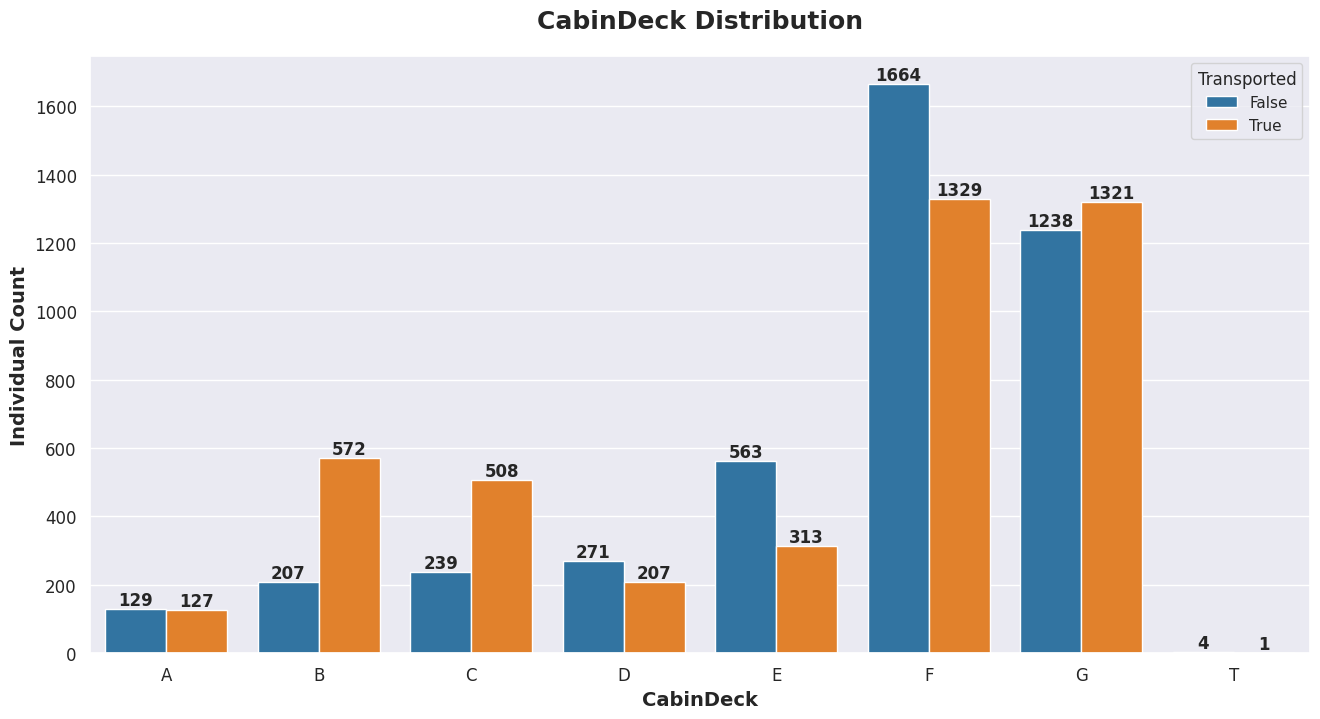

In [129]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8), facecolor='white')

bar = sns.countplot(x='CabinDeck', hue='Transported', data=train.sort_values('CabinDeck', ascending=True), ax=axs)
axs.set_ylabel('Individual Count', fontsize=14, fontweight='bold')
axs.set_xlabel('CabinDeck', fontsize=14, fontweight='bold')
axs.tick_params(axis='both', labelsize=12)
axs.set_title(f'CabinDeck Distribution',  fontsize=18, fontweight='bold', pad=20)

for i in bar.containers:
    bar.bar_label(i, padding=0, fontsize=12, fontweight='bold')

plt.tight_layout(pad=3)
plt.show()

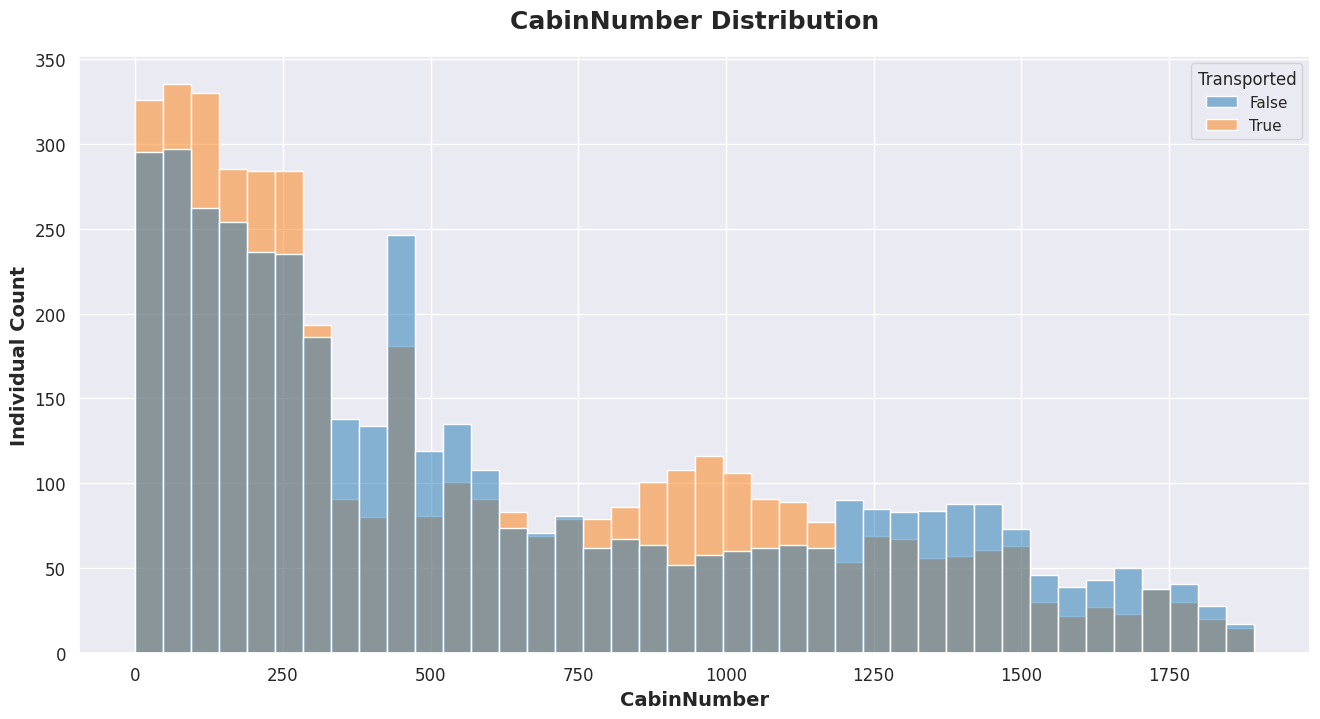

In [130]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8), facecolor='white')

sns.histplot(data=train, x='CabinNumber', hue='Transported', ax=axs, bins=40)
axs.set_ylabel('Individual Count', fontsize=14, fontweight='bold')
axs.set_xlabel('CabinNumber', fontsize=14, fontweight='bold')
axs.tick_params(axis='both', labelsize=12)
axs.set_title(f'CabinNumber Distribution',  fontsize=18, fontweight='bold', pad=20)

plt.tight_layout(pad=3)
plt.show()

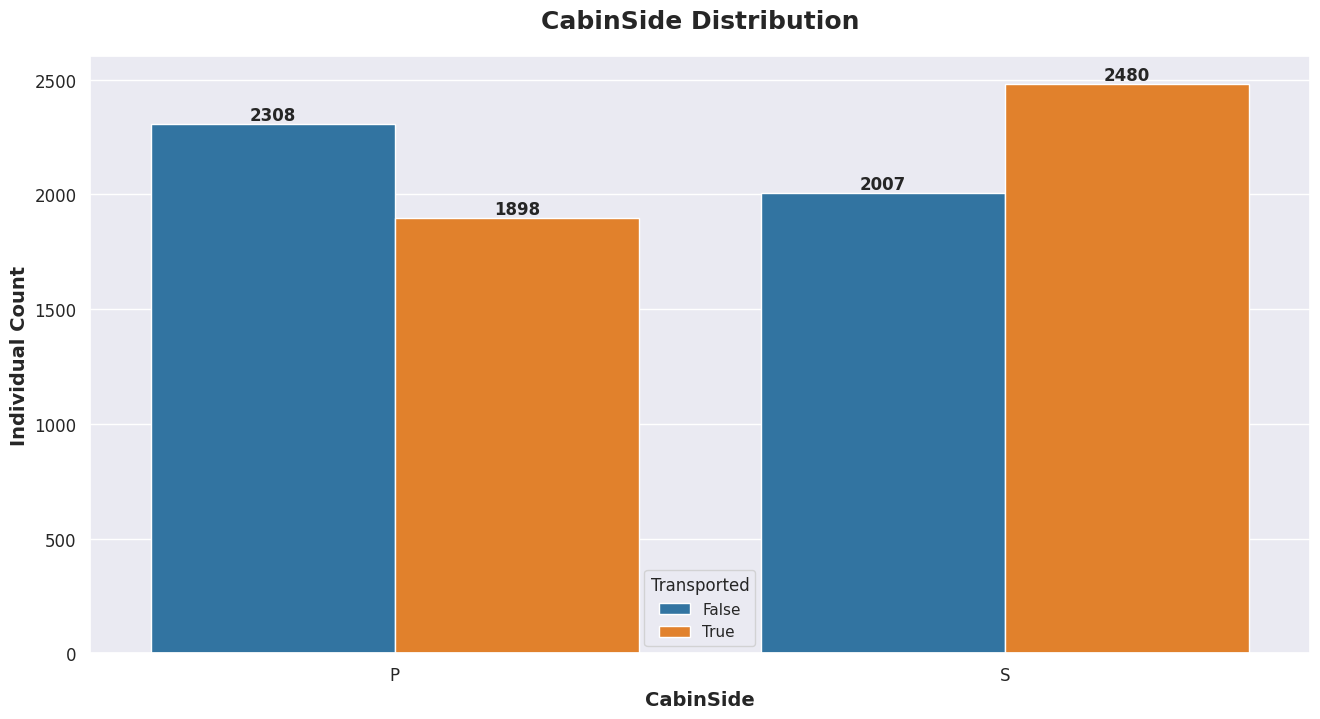

In [131]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8), facecolor='white')

bar = sns.countplot(data=train, x='CabinSide', hue='Transported', ax=axs)
axs.set_ylabel('Individual Count', fontsize=14, fontweight='bold')
axs.set_xlabel('CabinSide', fontsize=14, fontweight='bold')
axs.tick_params(axis='both', labelsize=12)
axs.set_title(f'CabinSide Distribution',  fontsize=18, fontweight='bold', pad=20)

for i in bar.containers:
    bar.bar_label(i, padding=0, fontsize=12, fontweight='bold')

plt.tight_layout(pad=3)
plt.show()

### __*Encoding and Model Training*__

_Checking data types of the final version of the data_

In [132]:
train.dtypes.to_frame()

,0
PassengerId,object
HomePlanet,object
CryoSleep,bool
Cabin,object
Destination,object
Age,int8
VIP,bool
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


In [133]:
train.select_dtypes(include=["object"]).nunique().to_frame()

,0
PassengerId,8693
HomePlanet,3
Cabin,6560
Destination,3
Name,8473
ExpenditureCategory,4
AgeGroup,6
CabinDeck,8
CabinSide,2


_Dropping unnecessary columns_

In [134]:
train.drop(axis=1, columns=['PassengerId', 'Cabin', 'Name'], inplace=True)
test.drop(axis=1, columns=['PassengerId', 'Cabin', 'Name'], inplace=True)
train.nunique().to_frame()

,0
HomePlanet,3
CryoSleep,2
Destination,3
Age,80
VIP,2
RoomService,1274
FoodCourt,1508
ShoppingMall,1116
Spa,1328
VRDeck,1307


_Splitting categorical features to apply different encoding methods_

In [135]:
nominal_categories = ['HomePlanet', 'Destination']
ordinal_categories = ['AgeGroup', 'CabinDeck', 'CabinSide', 'ExpenditureCategory']

#### _Encoding_

In [136]:
enc = LabelEncoder()
train[ordinal_categories] = train[ordinal_categories].apply(enc.fit_transform)
test[ordinal_categories] = test[ordinal_categories].apply(enc.fit_transform)

train = pd.get_dummies(train, columns=nominal_categories)
test = pd.get_dummies(test, columns=nominal_categories)

In [137]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenditure,...,AgeGroup,CabinDeck,CabinNumber,CabinSide,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39,False,0.0,0.0,0.0,0.0,0.0,False,0.0,...,4,1,0.0,0,False,True,False,False,False,True
1,False,24,False,109.0,9.0,25.0,549.0,44.0,True,736.0,...,2,5,0.0,1,True,False,False,False,False,True
2,False,58,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,...,5,0,0.0,1,False,True,False,False,False,True
3,False,33,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,...,4,0,0.0,1,False,True,False,False,False,True
4,False,16,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,...,1,5,1.0,1,True,False,False,False,False,True


In [138]:
test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure,HasExpenditure,...,AgeGroup,CabinDeck,CabinNumber,CabinSide,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,True,27,False,0.0,0.0,0.0,0.0,0.0,0.0,False,...,3,6,3.0,1,True,False,False,False,False,True
1,False,19,False,0.0,9.0,0.0,2823.0,0.0,2832.0,True,...,2,5,4.0,1,True,False,False,False,False,True
2,True,31,False,0.0,0.0,0.0,0.0,0.0,0.0,False,...,4,2,0.0,1,False,True,False,True,False,False
3,False,38,False,0.0,6652.0,0.0,181.0,585.0,7418.0,True,...,4,2,1.0,1,False,True,False,False,False,True
4,False,20,False,10.0,0.0,635.0,0.0,0.0,645.0,True,...,2,5,5.0,1,True,False,False,False,False,True


_All values are now encoded, time to train our model_

### _Model Training_

In [139]:
X = train.drop(columns=["Transported"])
y = train["Transported"]

In [140]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.fit_transform(test)

In [141]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6954, 21) (6954,)
(1739, 21) (1739,)


In [142]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(6954, 21) (6954,)
(1739, 21) (1739,)


_Creating a custom function to get a better view from our model_

In [143]:
def make_prediction(model):
    model.fit(x_train1, y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)

    a = accuracy_score(y_train1, x_train_pred1) * 100
    b = accuracy_score(y_test1, x_test_pred1) * 100

    results = {
        'Accuracy Score': b,
        'Precision Score': precision_score(y_test1, x_test_pred1),
        'Recall Score': recall_score(y_test1, x_test_pred1),
        'F1 Score': f1_score(y_test1, x_test_pred1),
    }
    results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Values'])
    cm_df = confusion_matrix(y_test1, x_test_pred1)

    display(results_df)

    plt.figure(figsize=(8, 4))
    sns.heatmap(cm_df, annot=True, fmt="g", cmap="Greens")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

_Results with different models_

,Values
Accuracy Score,77.745831
Precision Score,0.797808
Recall Score,0.747717
F1 Score,0.771951


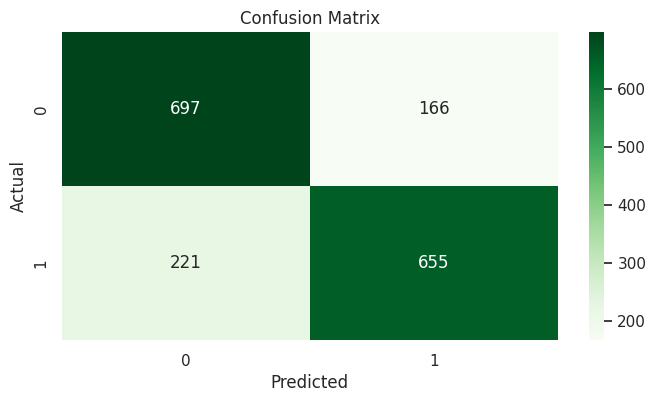

In [144]:
make_prediction(KNeighborsClassifier())

,Values
Accuracy Score,78.493387
Precision Score,0.774017
Recall Score,0.809361
F1 Score,0.791295


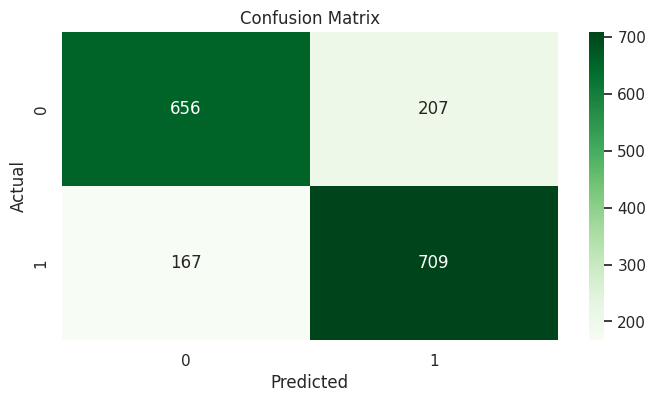

In [145]:
make_prediction(LogisticRegression())

,Values
Accuracy Score,78.148361
Precision Score,0.781179
Recall Score,0.786530
F1 Score,0.783845


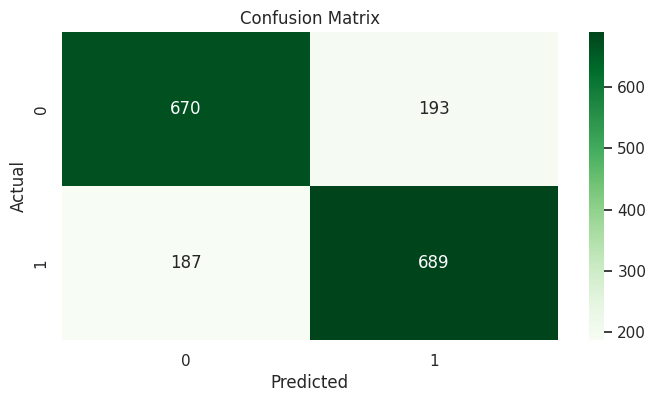

In [146]:
make_prediction(SVC())